# Homework Wet Assignment 3 - Regression

In [59]:
# imports

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from test_lr import test_lr
from verify_gradients import compare_gradients

## Preliminary: Updated Data Loading

### Load data

In [60]:
# load data set
def load_data(filename) -> np.ndarray:
    with open(f'data/{filename}') as file:
        data = pd.read_csv(file)
        return data

dataset = load_data('virus_data.csv')

# divide to train and test using the ID's (same method as in Wet HW 1)
id1 = 21
id2 = 9
train = dataset.sample(frac=0.8, random_state=id1 + id2)
test = dataset.drop(train.index)

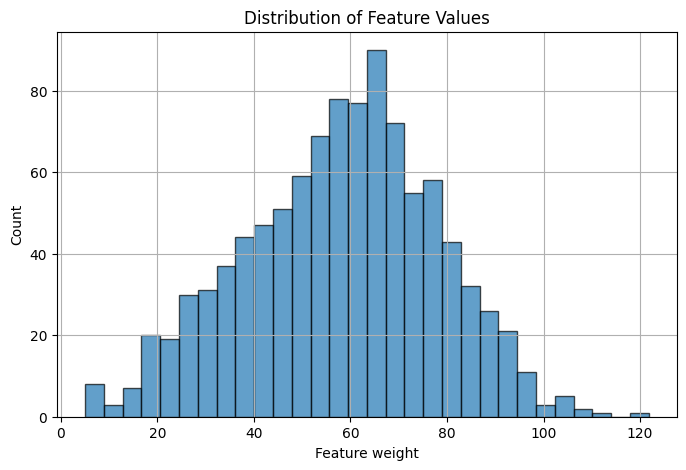

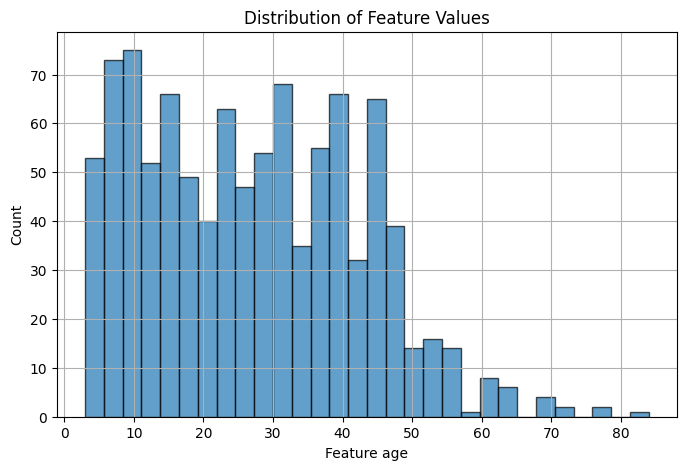

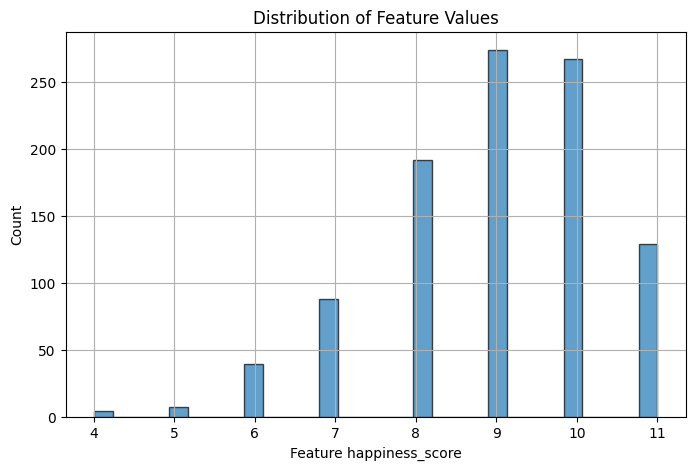

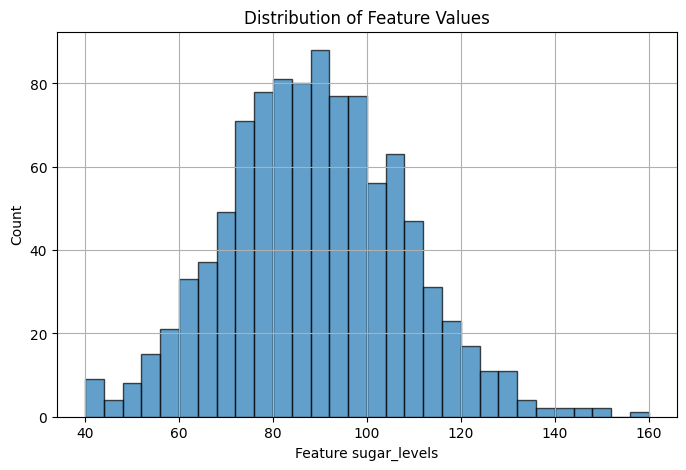

In [61]:
# Visualize the sugar levels, happiness_score, weight and age and decide on a normalization
# we didn't used these features in past HW assignments.

import matplotlib.pyplot as plt

def visualize_feat_distribution(name, train):
    feature_values = train[name]

    plt.figure(figsize=(8, 5))
    plt.hist(feature_values, bins=30, edgecolor='black', alpha=0.7)
    plt.xlabel(f"Feature {name}")
    plt.ylabel("Count")
    plt.title("Distribution of Feature Values")
    plt.grid(True)
    plt.show()

for name in ['weight', 'age', 'happiness_score', 'sugar_levels']:
    visualize_feat_distribution(name, train)



In [62]:
# make sure data is loaded correctly (commented in submission)
# assignment 2 data used

# train_hw2_path = '../wet_hw2/data/train_prepared.csv'
# test_hw2_path = '../wet_hw2/data/test_prepared.csv'
#
# def equals(l1, l2):
#     return len(l1) == len(l2) and all(v == u for v, u in zip(l1, l2))
#
#
# with open(train_hw2_path) as file:
#     train_hw2_data = pd.read_csv(file, index_col=0)
#     assert equals(train_hw2_data['patient_id'], train['patient_id'])
#
# with open(test_hw2_path) as file:
#     test_hw2_data = pd.read_csv(file, index_col=0)
#     assert equals(test_hw2_data['patient_id'], test['patient_id'])

### Preprocessing
Exactly as done in Wet HW 1.

In [63]:
def fill_numeric_nan_with_median(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    for col_name in df.columns:
        if df[col_name].dtype.kind in 'biufc':
            value = df[col_name].median()
        # else:
        #     value = df[col_name].mode(dropna=True)
        #     value = value.iloc[0] if not value.empty else None
            df[col_name] = df[col_name].fillna(value)
    return df

def normalize(
        test: pd.DataFrame,
        train: pd.DataFrame,
        mm_scale_columns: list,
        z_scale_columns: list
) -> (pd.DataFrame, pd.DataFrame):
    scaler_mm = MinMaxScaler(feature_range=(-1, 1))
    scaler_z = StandardScaler()

     # Fit on train only, transform both train and test
    train[mm_scale_columns] = scaler_mm.fit_transform(train[mm_scale_columns])
    test[mm_scale_columns] = scaler_mm.transform(test[mm_scale_columns])

    train[z_scale_columns] = scaler_z.fit_transform(train[z_scale_columns])
    test[z_scale_columns] = scaler_z.transform(test[z_scale_columns])
    return train, test

train = fill_numeric_nan_with_median(train)
test = fill_numeric_nan_with_median(test)

mm_scale_columns = ['PCR_01', 'PCR_02', 'PCR_04', 'PCR_06', 'PCR_08', 'age', 'weight', 'sugar_levels']
z_scale_columns = ['PCR_03', 'PCR_05', 'PCR_07', 'PCR_09', 'PCR_10', 'happiness_score']
train, test = normalize(train, test, mm_scale_columns, z_scale_columns)


# we don't want to train using the patient_id as feature as it is unrelated to the end result.
train_full = train.copy()
train.drop(columns=['patient_id'], inplace=True)

## Section 1: Linear regression implementation

### Q1

In [64]:
from LinearRegressor import LinearRegressor as LR

### load new division for the dataset (Q2)

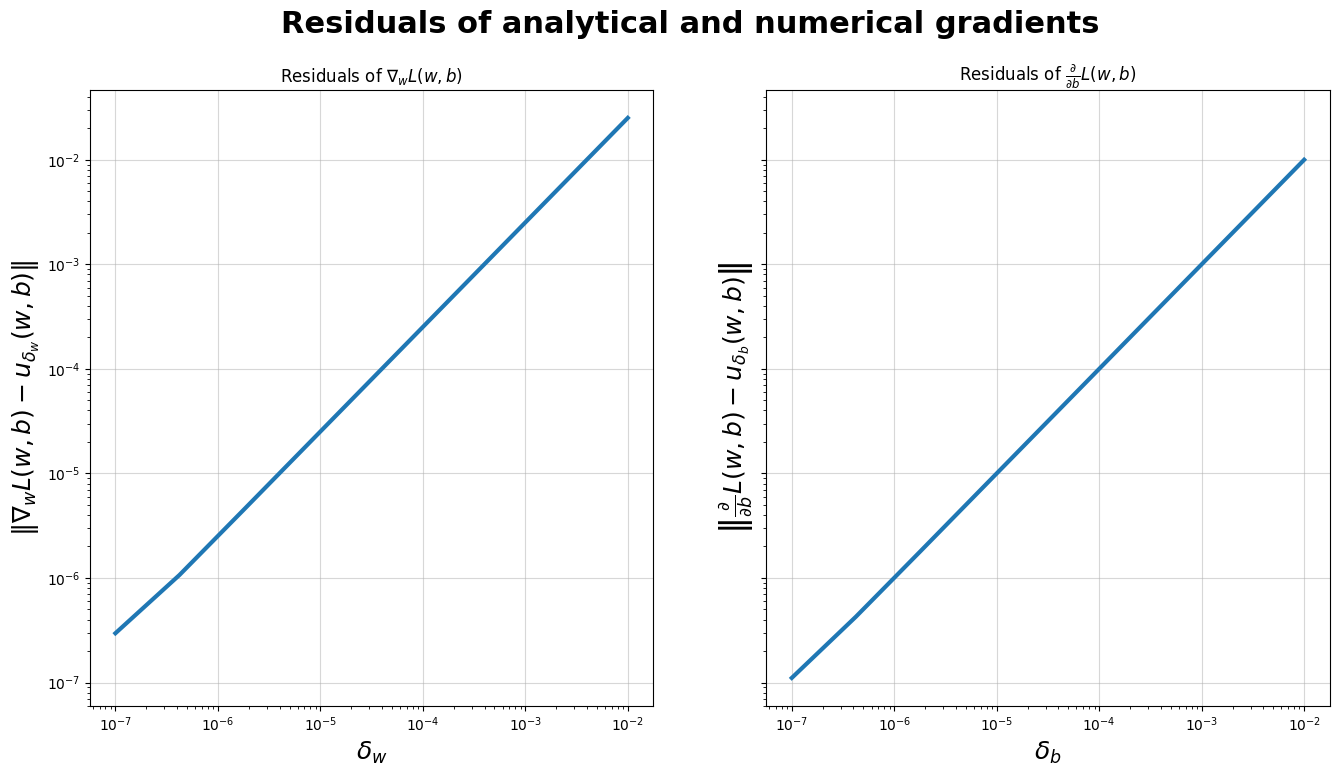

In [65]:
# divide to train and test using the ID's (same method as in Wet HW 1)
train_new = train.sample(frac=0.8)
validation_new = train.drop(train_new.index)

# train_new, validation_new = normalize(train_new, validation_new, mm_scale_columns, z_scale_columns)
X_train = train_new.drop(columns=['contamination_level']).to_numpy()
y_train = train_new['contamination_level'].to_numpy()

X_val = validation_new.drop(columns=['contamination_level']).to_numpy()
y_val = validation_new['contamination_level'].to_numpy()

compare_gradients(X_train, y_train, deltas=np.logspace(-7, -2, 9))

### Q3

lr size = 1e-09, Best train loss = 0.13734025562352245, Best validation loss = 0.1351859144944695
lr size = 1e-08, Best train loss = 0.13733355860202742, Best validation loss = 0.13517961643670517
lr size = 1e-07, Best train loss = 0.1372666124137193, Best validation loss = 0.13511665847664978
lr size = 1e-06, Best train loss = 0.13659954721878767, Best validation loss = 0.1344893350537459
lr size = 1e-05, Best train loss = 0.13016269922322304, Best validation loss = 0.1284362402639864
lr size = 0.0001, Best train loss = 0.08427226172902089, Best validation loss = 0.08533157576394938
lr size = 0.001, Best train loss = 0.026167232736416152, Best validation loss = 0.03239631829894755
lr size = 0.01, Best train loss = 0.021991835533848807, Best validation loss = 0.026556715051275416
lr size = 0.1, Best train loss = 0.021979454266363958, Best validation loss = 0.025773965369029934


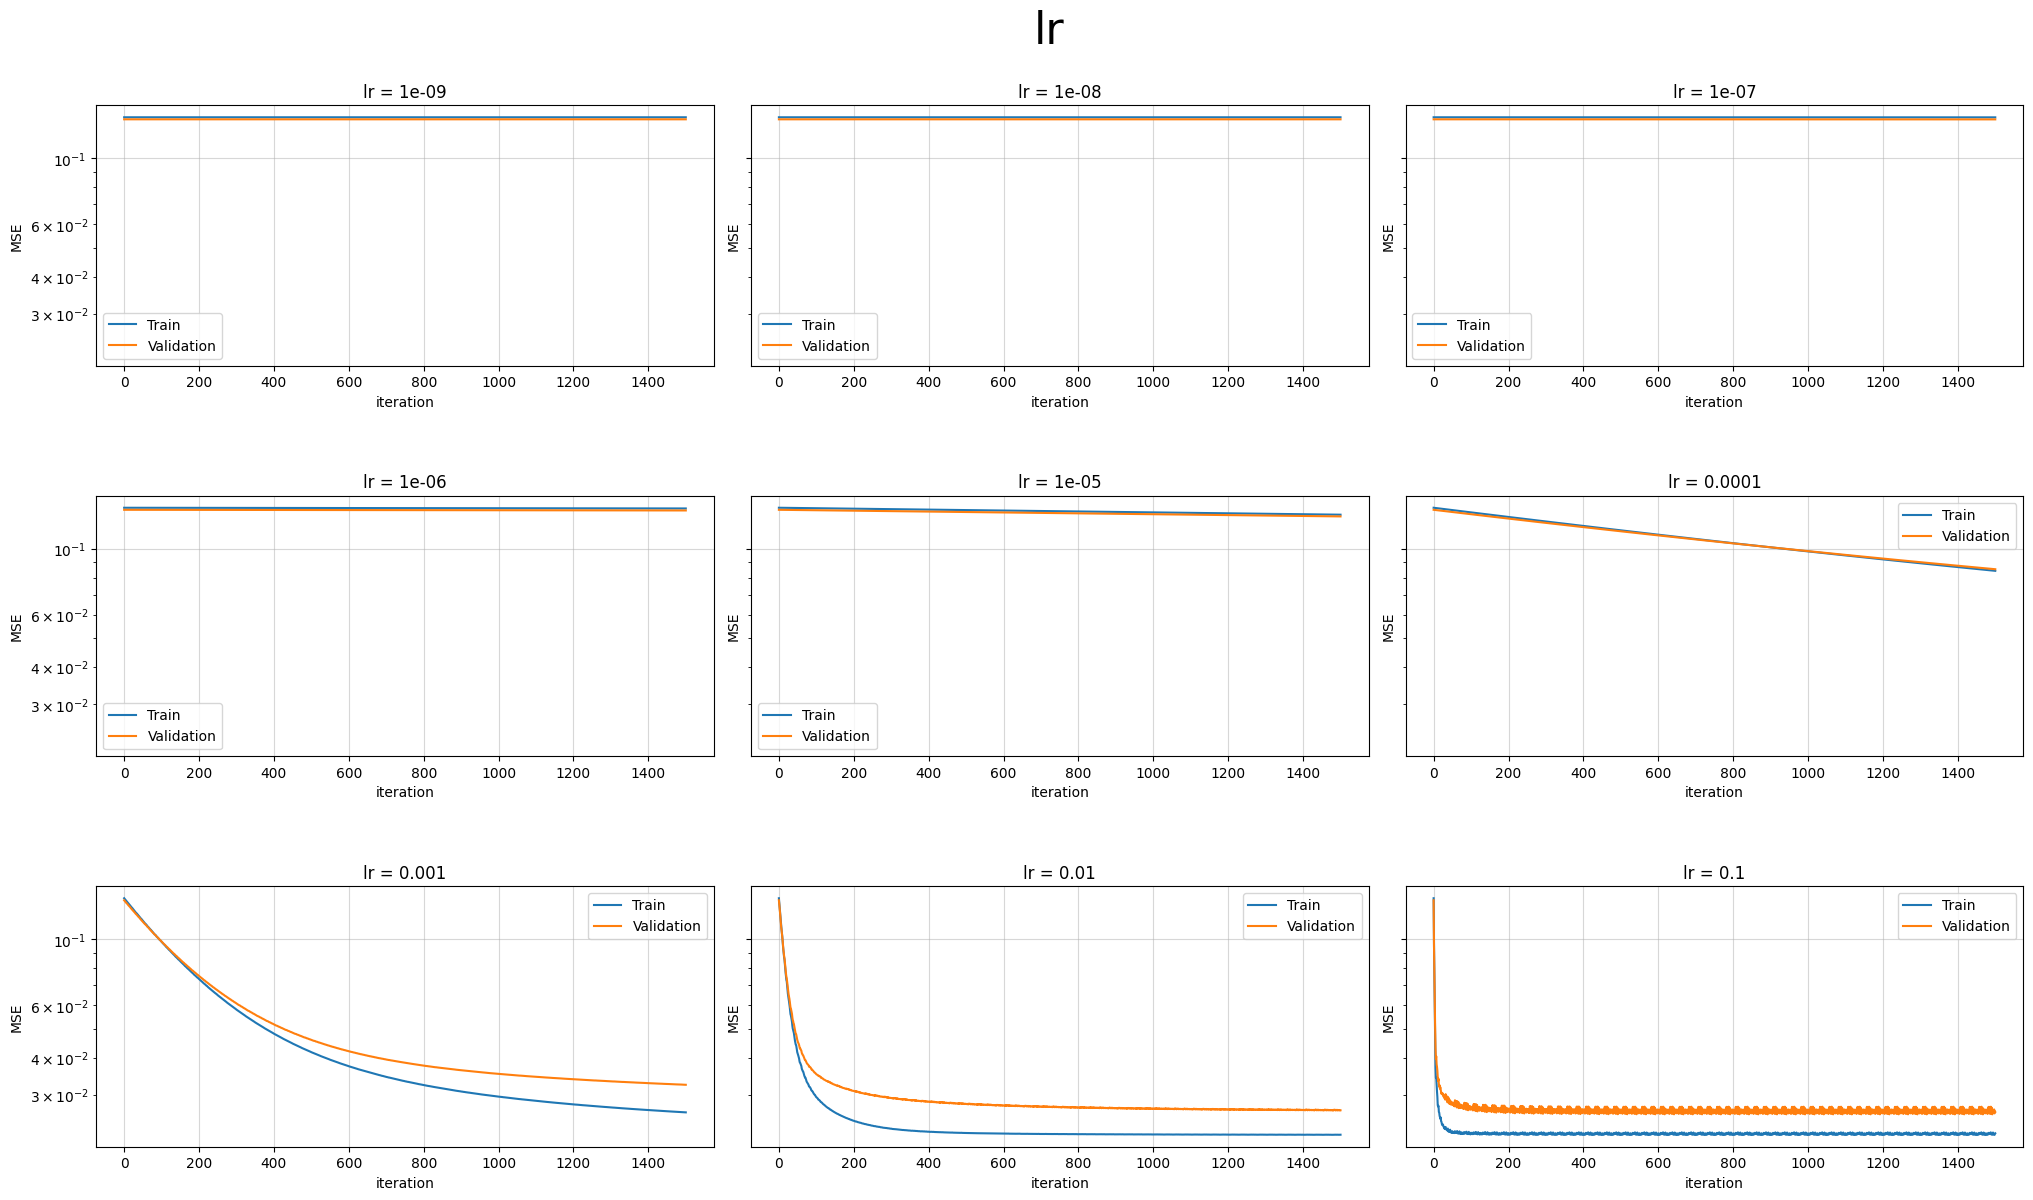

In [66]:
# def check_nan_inf(df, name="Data"):
#     print(f"Checking {name}...")
#     print(" - Any NaNs:", df.isna().values.any())
#     print(" - Any Infs:", np.isinf(df.values).any())
#     print(" - Any non-finite values:", not np.all(np.isfinite(df.values)))
#
# check_nan_inf(pd.DataFrame(X_train), "X_train")
# check_nan_inf(pd.Series(y_train), "y_train")
# check_nan_inf(pd.DataFrame(X_val), "X_val")
# check_nan_inf(pd.Series(y_val), "y_val")
test_lr(X_train, y_train, X_val, y_val, title='lr')